In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import time
import imageio

def gen_map(file):
    with open(file, 'rb') as _f:
        index_psnr = pickle.load(_f) # (N,3)
    index_psnr = np.array(index_psnr)
    # print(index_psnr.shape)
    x = index_psnr[:,0]
    y = index_psnr[:,1]
    x_max = int(x.max())
    y_max = int(y.max())
    # print(x_max)
    # print(y_max)
    heatmap = np.empty((y_max+1,x_max+1))
    for i in range(index_psnr.shape[0]):
        yi = int(index_psnr[i][0])
        xi = int(index_psnr[i][1])
        heatmap[xi][yi] = index_psnr[i][2]
    return heatmap

def plot_map(heatmap, show=True, save=None, dpi=200):
    plt.clf()
    psnr = plt.imshow(heatmap,cmap='hot')
    plt.colorbar(psnr)
    if save:
        plt.savefig(save,dpi=dpi)
    if show:
        plt.show()

def plot_hist(heatmap, show=True, save=None):
    bar_data = heatmap.flatten()
    plt.clf()
    plt.hist(bar_data, bins=200, density=True)
    if show:
        plt.show()
    if save:
        plt.savefig(save)

def gen_map_partion(file, partion=1, partion_list=None):
    
    def is_in_list(xi,yi,list):
        if list is None:
            return True
        else:
            l = list - (xi,yi)
            l = l==0
            l = l[:,0] * l[:,1]
            return np.sum(l) == 1
    
    with open(file, 'rb') as _f:
        index_psnr = pickle.load(_f) # (N,3)
    index_psnr = np.array(index_psnr)
    # print(index_psnr.shape)
    x = index_psnr[:,0]
    y = index_psnr[:,1]
    x_max = int(x.max())
    y_max = int(y.max())

    heatmap = np.zeros((y_max+1,x_max+1))
    n_patch = index_psnr.shape[0]
    n_patch_partion = int(n_patch * partion)
    print(n_patch_partion)
    for i in range(n_patch_partion):
        yi = int(index_psnr[i][0])
        xi = int(index_psnr[i][1])
        if is_in_list(yi,xi,partion_list):
            heatmap[xi][yi] = index_psnr[i][2]
    return heatmap


def samplePatchesProg(img_dim, patch_size, n_samples, maxiter=5000):
    # Sample patches using dart throwing (works well for sparse/non-overlapping patches)

    # estimate each sample patch area
    full_area = float(img_dim[0] * img_dim[1])
    sample_area = full_area / n_samples

    # get corresponding dart throwing radius
    radius = np.sqrt(sample_area / np.pi)
    minsqrdist = (2 * radius) ** 2

    # compute the distance to the closest patch
    def get_sqrdist(x, y, patches):
        if len(patches) == 0:
            return np.infty
        dist = patches - [x, y]
        return np.sum(dist ** 2, axis=1).min()

    # perform dart throwing, progressively reducing the radius
    rate = 0.96
    patches = np.zeros((n_samples, 2), dtype=int)
    xmin, xmax = 0, img_dim[1] - patch_size[1] - 1
    ymin, ymax = 0, img_dim[0] - patch_size[0] - 1
    for patch in range(n_samples):
        done = False
        while not done:
            for i in range(maxiter):
                x = random.randint(xmin, xmax)
                y = random.randint(ymin, ymax)
                sqrdist = get_sqrdist(x, y, patches[:patch, :])
                if sqrdist > minsqrdist:
                    patches[patch, :] = [x, y]
                    done = True
                    break
            if not done:
                radius *= rate
                minsqrdist = (2 * radius) ** 2

    return patches

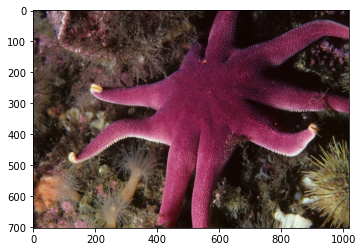

In [3]:
img_file = "/data/shizun/dataset/DIV2K/DIV2K_train_LR_bicubic/X2/0001x2.png"
img = imageio.imread(img_file)
plt.imshow(img)

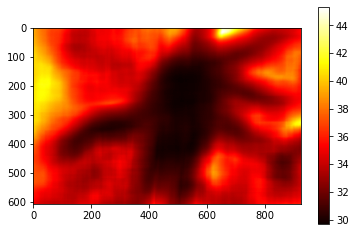

2.6843924522399902


In [4]:
# plot single image psnr heatmap
psnr_file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_psnr.pt"
image_file = psnr_file.replace(".pt",".png")
save_file = psnr_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(psnr_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

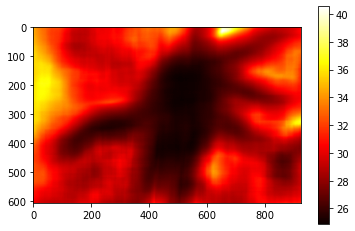

2.805422067642212


In [7]:
# plot single image psnr heatmap
psnr_file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_psnr_fast.pt"
image_file = psnr_file.replace(".pt",".png")
save_file = psnr_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(psnr_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

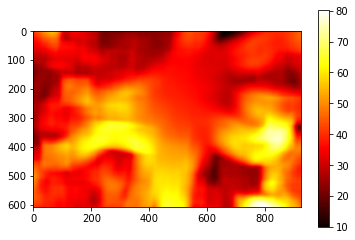

1.7004833221435547


In [8]:
# plot single image std heatmap
std_file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_std0_rgb_p192.pt"
image_file = std_file.replace(".pt",".png")
save_file = std_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(std_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

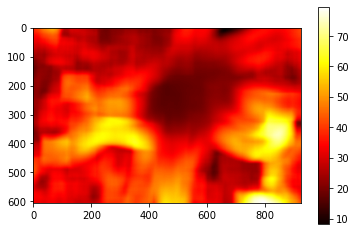

1.6269071102142334


In [10]:
# plot single image std heatmap
std_file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_std1_rgb_p192.pt"
image_file = std_file.replace(".pt",".png")
save_file = std_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(std_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

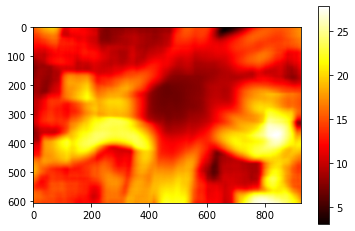

4.156934499740601


In [4]:
# plot single image std heatmap
std_file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_std1_ycbcr.pt"
image_file = std_file.replace(".pt",".png")
save_file = std_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(std_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

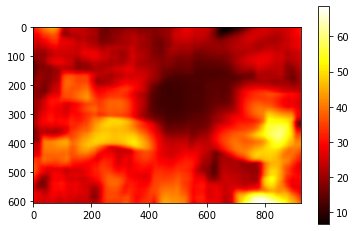

1.6723546981811523


In [10]:
# plot single image std heatmap
std_file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_std2_ycbcr_p192_np.pt"
image_file = std_file.replace(".pt",".png")
save_file = std_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(std_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

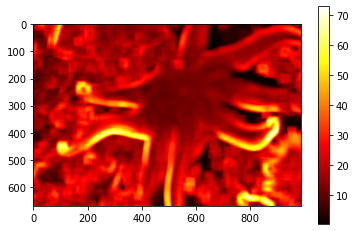

5.490391492843628


In [8]:
# plot single image std heatmap
std_file = "/home/littlepure/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_std2_ycbcr_p64.pt"
image_file = std_file.replace(".pt",".png")
save_file = std_file.replace(".pt","_hm.jpg")
tic = time.time()
heatmap = gen_map(std_file)
plot_map(heatmap,save=save_file)
toc = time.time()
print(toc - tic)

107855
2.2752695083618164


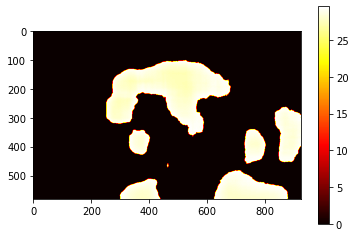

In [19]:
# plot partion heatmap
tic = time.time()
heatmap = gen_map_partion(psnr_file, partion=0.2)
toc = time.time()
print(toc - tic)
plot_map(heatmap)

53927


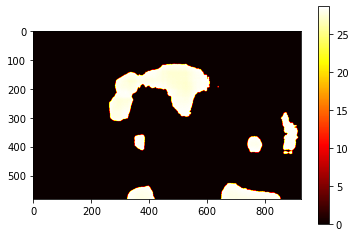

In [20]:
# plot partion heatmap
heatmap = gen_map_partion(psnr_file, partion=0.1)
plot_map(heatmap)

5392


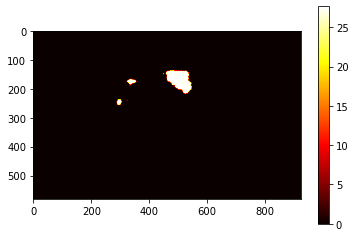

In [10]:
# plot partion heatmap
heatmap = gen_map_partion(psnr_file, partion=0.01)
plot_map(heatmap)

539


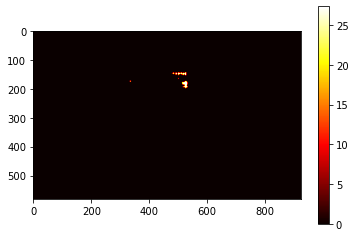

In [11]:
# plot partion heatmap
heatmap = gen_map_partion(psnr_file, partion=0.001)
plot_map(heatmap)

53


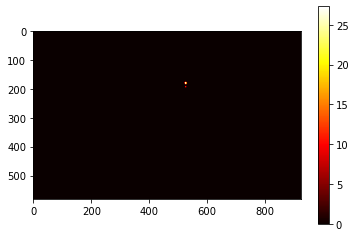

In [12]:
# plot partion heatmap
heatmap = gen_map_partion(psnr_file, partion=0.0001)
plot_map(heatmap)

5


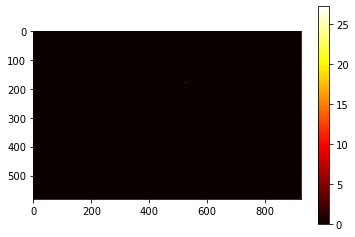

In [13]:
# plot partion heatmap
heatmap = gen_map_partion(psnr_file, partion=0.00001)
plot_map(heatmap)

In [21]:
img_file = psnr_file.replace("_psnr.pt", ".pt")
with open(img_file, 'rb') as f:
    lr = pickle.load(f) # (W,H,3)
scale = 2
patch_size = (int(192 / scale),int(192 / scale))
img_dim_ori = (lr.shape[0], lr.shape[1])
img_dim = (lr.shape[0] + patch_size[0], lr.shape[1] + patch_size[1])
n_samples = 5000

print("start sampling")
patches = samplePatchesProg(img_dim, patch_size, n_samples, maxiter=10)
print("end sampling, patches.shape: {}".format(patches.shape))
# print(patches)

start sampling
end sampling, patches.shape: (5000, 2)


539275
46.36529731750488


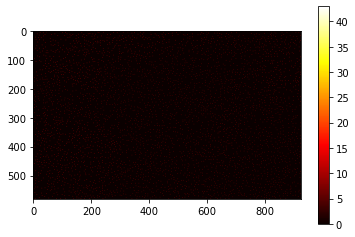

In [32]:
tic = time.time()
heatmap = gen_map_partion(psnr_file, partion_list=patches)
toc = time.time()
print(toc - tic)
plot_map(heatmap)

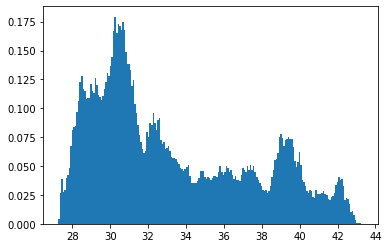

<Figure size 432x288 with 0 Axes>

In [3]:
# plot single image psnr histogram
save_file = psnr_file.replace("_psnr.pt","_hist.jpg")
plot_hist(heatmap,save=save_file)

In [1]:
# plot all images psnr heatmap
from tqdm import tqdm

def is_bin_file(filename, scale):
    return any(filename.endswith(ext) for ext in ['x{}_psnr.pt'.format(scale)])

scale = 2
files_dir = "/home/littlepure/heatmap/"
all_files = os.listdir(files_dir)
files = []
for f in all_files:
    if is_bin_file(f,scale):
        files.append(f)
print('number of files:', len(files))
files.sort()
# for i in tqdm(range(len(files))):
#     psnr_file = files[i]
for psnr_file in tqdm(files):
    image_file = psnr_file.replace("_psnr.pt",".png")
    save_file = psnr_file.replace("_psnr.pt","_hm.jpg")
    heatmap = gen_map(psnr_file)
    plot_map(heatmap, show=False, save=save_file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/littlepure/heatmap/'

In [7]:
import pickle
import numpy as np

file = "/data/shizun/dataset/DIV2K/bin/DIV2K_train_LR_bicubic/X2/0001x2_std1_rgb_p192.pt"

with open(file, 'rb') as _f:
    index_psnr = pickle.load(_f) # (N,3)
print(type(index_psnr))
index_psnr = np.array(index_psnr)
print(type(index_psnr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
